1. 初始化参数：
    1.1：使用0来初始化参数。
    1.2：使用随机数来初始化参数。
    1.3：使用抑梯度异常初始化参数（参见视频中的梯度消失和梯度爆炸）。
2. 正则化模型：
    2.1：使用二范数对二分类模型正则化，尝试避免过拟合。
    2.2：使用随机删除节点的方法精简模型，同样是为了尝试避免过拟合。
3. 梯度校验  ：对模型使用梯度校验，检测它是否在梯度下降的过程中出现误差过大的情况。

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import init_utils   #第一部分，初始化
import reg_utils    #第二部分，正则化
import gc_utils     #第三部分，梯度校验
#%matplotlib inline #如果你使用的是Jupyter Notebook，请取消注释。
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

初始化参数

我们在初始化之前，我们来看看我们的数据集是怎样的：

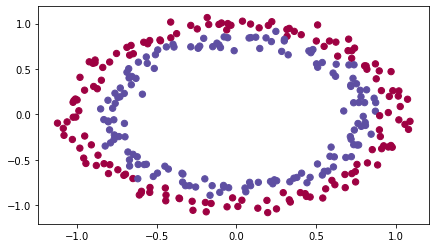

In [12]:
train_X, train_Y, test_X, test_Y = init_utils.load_dataset(is_plot=True)

#### 我们将会尝试下面三种初始化方法:

##### 初始化为0：在输入参数中全部初始化为0，参数名为initialization = “zeros”，核心代码： 
   parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l - 1]))
##### 初始化为随机数：把输入参数设置为随机值，权重初始化为大的随机值。参数名为initialization = “random”，核心代码： 
   parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10
##### 抑梯度异常初始化：参见梯度消失和梯度爆炸的那一个视频，参数名为initialization = “he”，核心代码： 
   parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])


In [13]:
def model(X,Y,learning_rate=0.01,num_iterations=15000,print_cost=True,initialization="he",is_polt=True):
    """
    实现一个三层的神经网络：LINEAR ->RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID

    参数：
        X - 输入的数据，维度为(2, 要训练/测试的数量)
        Y - 标签，【0 | 1】，维度为(1，对应的是输入的数据的标签)
        learning_rate - 学习速率
        num_iterations - 迭代的次数
        print_cost - 是否打印成本值，每迭代1000次打印一次
        initialization - 字符串类型，初始化的类型【"zeros" | "random" | "he"】
        is_polt - 是否绘制梯度下降的曲线图
    返回
        parameters - 学习后的参数
    """
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],10,5,1]

    #选择初始化参数的类型
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    else : 
        print("错误的初始化参数！程序退出")
        exit

    #开始学习
    for i in range(0,num_iterations):
        #前向传播
        a3 , cache = init_utils.forward_propagation(X,parameters)

        #计算成本        
        cost = init_utils.compute_loss(a3,Y)

        #反向传播
        grads = init_utils.backward_propagation(X,Y,cache)

        #更新参数
        parameters = init_utils.update_parameters(parameters,grads,learning_rate)

        #记录成本
        if i % 1000 == 0:
            costs.append(cost)
            #打印成本
            if print_cost:
                print("第" + str(i) + "次迭代，成本值为：" + str(cost))


    #学习完毕，绘制成本曲线
    if is_polt:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

    #返回学习完毕后的参数
    return parameters

尝试三种从初始化方式

1.初始化为零

In [14]:
def initialize_parameters_zeros(layers_dims):
    """
    将模型的参数全部设置为0

    参数：
        layers_dims - 列表，模型的层数和对应每一层的节点的数量
    返回
        parameters - 包含了所有W和b的字典
            W1 - 权重矩阵，维度为（layers_dims[1], layers_dims[0]）
            b1 - 偏置向量，维度为（layers_dims[1],1）
            ···
            WL - 权重矩阵，维度为（layers_dims[L], layers_dims[L -1]）
            bL - 偏置向量，维度为（layers_dims[L],1）
    """
    parameters = {}

    L = len(layers_dims) #网络层数

    for l in range(1,L):
        parameters["W" + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        parameters["b" + str(l)] = np.zeros((layers_dims[l],1))

        #使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))

    return parameters

In [15]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


第0次迭代，成本值为：0.6931471805599453
第1000次迭代，成本值为：0.6931471805599453
第2000次迭代，成本值为：0.6931471805599453
第3000次迭代，成本值为：0.6931471805599453
第4000次迭代，成本值为：0.6931471805599453
第5000次迭代，成本值为：0.6931471805599453
第6000次迭代，成本值为：0.6931471805599453
第7000次迭代，成本值为：0.6931471805599453
第8000次迭代，成本值为：0.6931471805599453
第9000次迭代，成本值为：0.6931471805599453
第10000次迭代，成本值为：0.6931471805599455
第11000次迭代，成本值为：0.6931471805599453
第12000次迭代，成本值为：0.6931471805599453
第13000次迭代，成本值为：0.6931471805599453
第14000次迭代，成本值为：0.6931471805599453


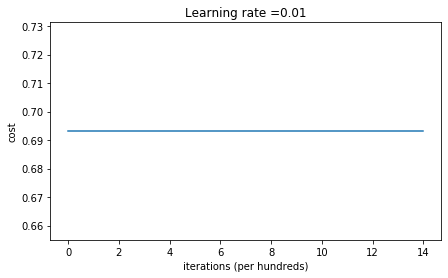

In [16]:
# 使用parameters = initialize_parameters_zeros([3,2,1])参数来训练模型
parameters = model(train_X, train_Y, initialization = "zeros",is_polt=True)

从上图中我们可以看到学习率一直没有变化，也就是说这个模型根本没有学习。我们来看看预测的结果怎么样：

In [17]:
print ("训练集:")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print ("测试集:")
predictions_test = init_utils.predict(test_X, test_Y, parameters)

训练集:
Accuracy: 0.5
测试集:
Accuracy: 0.5


性能确实很差，而且成本并没有真正降低，算法的性能也比随机猜测要好。为什么？让我们看看预测和决策边界的细节：

In [22]:
print("predictions_train = " + str(predictions_train))
print("predictions_test = " + str(predictions_test))

# plt.title("Model with Zeros initialization")
# axes = plt.gca()
# axes.set_xlim([-1.5, 1.5])
# axes.set_ylim([-1.5, 1.5])
# init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters, x.T), train_X, train_Y)

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


分类失败，该模型预测每个都为0。通常来说，零初始化都会导致神经网络无法打破对称性，最终导致的结果就是无论网络有多少层，最终只能得到和Logistic函数相同的效果。

2.随机初始化

为了打破对称性，我们可以随机地把参数赋值。在随机初始化之后，每个神经元可以开始学习其输入的不同功能，我们还会设置比较大的参数值，看看会发生什么。

In [23]:
def initialize_parameters_random(layers_dims):
    """
    参数：
        layers_dims - 列表，模型的层数和对应每一层的节点的数量
    返回
        parameters - 包含了所有W和b的字典
            W1 - 权重矩阵，维度为（layers_dims[1], layers_dims[0]）
            b1 - 偏置向量，维度为（layers_dims[1],1）
            ···
            WL - 权重矩阵，维度为（layers_dims[L], layers_dims[L -1]）
            b1 - 偏置向量，维度为（layers_dims[L],1）
    """

    np.random.seed(3)               # 指定随机种子
    parameters = {}
    L = len(layers_dims)            # 层数

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10 #使用10倍缩放
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

        #使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))

    return parameters

In [24]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


D:\programming\项目\tensorflow\Course 2 - 改善深层神经网络01习题\init_utils.py:52: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
D:\programming\项目\tensorflow\Course 2 - 改善深层神经网络01习题\init_utils.py:52: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


第0次迭代，成本值为：inf
第1000次迭代，成本值为：0.6239567039908781
第2000次迭代，成本值为：0.5978043872838292
第3000次迭代，成本值为：0.563595830364618
第4000次迭代，成本值为：0.5500816882570866
第5000次迭代，成本值为：0.5443417928662615
第6000次迭代，成本值为：0.5373553777823036
第7000次迭代，成本值为：0.4700141958024487
第8000次迭代，成本值为：0.3976617665785177
第9000次迭代，成本值为：0.39344405717719166
第10000次迭代，成本值为：0.39201765232720626
第11000次迭代，成本值为：0.38910685278803786
第12000次迭代，成本值为：0.38612995897697244
第13000次迭代，成本值为：0.3849735792031832
第14000次迭代，成本值为：0.38275100578285265


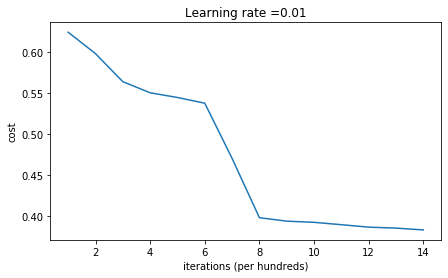

训练集：
Accuracy: 0.83
测试集：
Accuracy: 0.86
[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


In [25]:
parameters = model(train_X, train_Y, initialization = "random",is_polt=True)
print("训练集：")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print("测试集：")
predictions_test = init_utils.predict(test_X, test_Y, parameters)

print(predictions_train)
print(predictions_test)

 我们可以看到误差开始很高。这是因为由于具有较大的随机权重，最后一个激活(sigmoid)输出的结果非常接近于0或1，而当它出现错误时，它会导致非常高的损失。初始化参数如果没有很好地话会导致梯度消失、爆炸，这也会减慢优化算法。如果我们对这个网络进行更长时间的训练，我们将看到更好的结果，但是使用过大的随机数初始化会减慢优化的速度。
  总而言之，将权重初始化为非常大的时候其实效果并不好，下面我们试试小一点的参数值。


3.抑梯度异常初始化

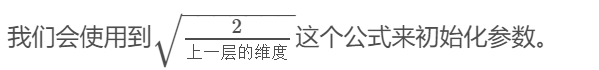

In [27]:
def initialize_parameters_he(layers_dims):
    """
    参数：
        layers_dims - 列表，模型的层数和对应每一层的节点的数量
    返回
        parameters - 包含了所有W和b的字典
            W1 - 权重矩阵，维度为（layers_dims[1], layers_dims[0]）
            b1 - 偏置向量，维度为（layers_dims[1],1）
            ···
            WL - 权重矩阵，维度为（layers_dims[L], layers_dims[L -1]）
            b1 - 偏置向量，维度为（layers_dims[L],1）
    """

    np.random.seed(3)               # 指定随机种子
    parameters = {}
    L = len(layers_dims)            # 层数

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

        #使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))

    return parameters

In [28]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


第0次迭代，成本值为：0.8830537463419761
第1000次迭代，成本值为：0.6879825919728063
第2000次迭代，成本值为：0.6751286264523371
第3000次迭代，成本值为：0.6526117768893807
第4000次迭代，成本值为：0.6082958970572938
第5000次迭代，成本值为：0.5304944491717495
第6000次迭代，成本值为：0.4138645817071794
第7000次迭代，成本值为：0.3117803464844441
第8000次迭代，成本值为：0.23696215330322562
第9000次迭代，成本值为：0.18597287209206836
第10000次迭代，成本值为：0.15015556280371817
第11000次迭代，成本值为：0.12325079292273552
第12000次迭代，成本值为：0.09917746546525932
第13000次迭代，成本值为：0.08457055954024274
第14000次迭代，成本值为：0.07357895962677362


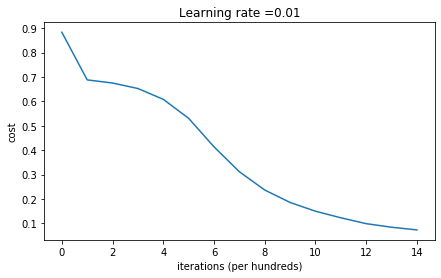

训练集:
Accuracy: 0.9933333333333333
测试集:
Accuracy: 0.96


In [29]:
parameters = model(train_X, train_Y, initialization = "he",is_polt=True)
print("训练集:")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print("测试集:")
init_utils.predictions_test = init_utils.predict(test_X, test_Y, parameters)

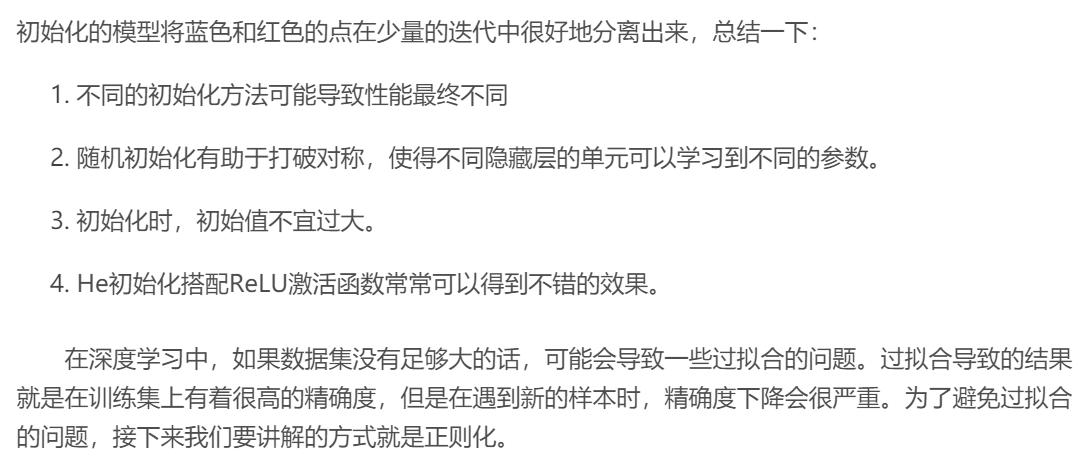

参考链接：https://blog.csdn.net/u013733326/article/details/79847918